<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/EM%E6%97%A0%E7%9B%91%E7%9D%A3%E7%AE%97%E6%B3%95iris%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import pairwise_distances_argmin

%matplotlib inline

In [2]:
def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a-d, b+d

In [7]:
## 数据加载
iris_feature = u'Calyx length', u'Calyx width', u'Petal length', u'Petal width'
path = 'iris.data'
data = pd.read_csv(path, header=None)
x_prime = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

Characteristic attribute: Calyx length Calyx width
Actual mean：
 [[5.006 3.418]
 [5.936 2.77 ]
 [6.588 2.974]]
Predicted mean=
 [[5.90114537 2.74385294]
 [6.6814044  3.0285628 ]
 [5.01493896 3.4404862 ]]
Forecast variance =
 [[[0.27544608 0.08866062]
  [0.08866062 0.09382524]]

 [[0.36087007 0.05158991]
  [0.05158991 0.08923683]]

 [[0.1194876  0.08969867]
  [0.08969867 0.12147459]]]
order：	 [2 0 1]
acc：79.33%


Characteristic attribute: Calyx length Petal length
Actual mean：
 [[5.006 1.464]
 [5.936 4.26 ]
 [6.588 5.552]]
Predicted mean=
 [[6.04240777 4.41742864]
 [6.58888904 5.63329718]
 [5.0060006  1.46399865]]
Forecast variance =
 [[[0.28119672 0.23746926]
  [0.23746926 0.31503012]]

 [[0.48521779 0.36602418]
  [0.36602418 0.32601109]]

 [[0.12176525 0.01581631]
  [0.01581631 0.0295045 ]]]
order：	 [2 0 1]
acc：91.33%


Characteristic attribute: Calyx length Petal width
Actual mean：
 [[5.006 0.244]
 [5.936 1.326]
 [6.588 2.026]]
Predicted mean=
 [[5.00607264 0.23754806]
 [6.56291563 2

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


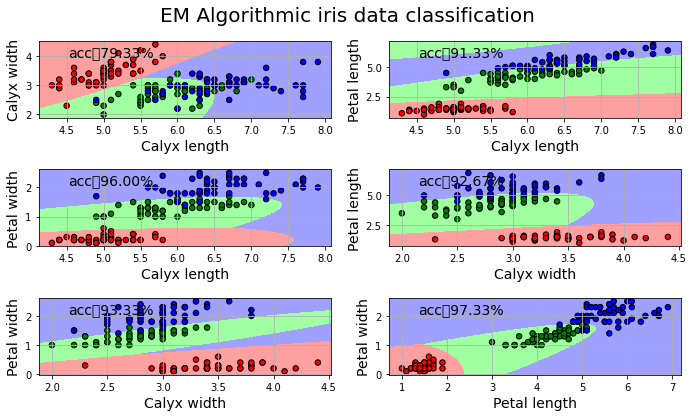

In [8]:
# 类别数量
n_components = 3
# 不同特征属性分类
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 6), facecolor='w')
cm_light = mpl.colors.ListedColormap(['#FFA0A0', '#A0FFA0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b'])

for k, pair in enumerate(feature_pairs):
    print (u"Characteristic attribute:", iris_feature[pair[0]], iris_feature[pair[1]])
    x = x_prime[pair]
    # 计算实际的均值
    mean = np.array([np.mean(x[y == i], axis=0) for i in range(3)])
    print (u"Actual mean：\n",mean)
    
    # 模型构建
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=28)
    gmm.fit(x)
    
    # 效果参数输出
    print ("Predicted mean=\n", gmm.means_)
    print ("Forecast variance =\n", gmm.covariances_)
    
    # 获取预测结果
    y_hat = gmm.predict(x)
    order = pairwise_distances_argmin(mean, gmm.means_, axis=1, metric='euclidean')
    print ('order：\t', order)
    
    # 修改预测结果顺序
    n_sample = y.size
    n_types = 3
    change = np.empty((n_types, n_sample), dtype=np.bool)
    for i in range(n_types):
        change[i] = y_hat == order[i]
    for i in range(n_types):
        y_hat[change[i]] = i
    
    # 计算准确率
    acc = u'acc：%.2f%%' % (100*np.mean(y_hat == y))
    print (acc)
    
    # 画图
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    grid_hat = gmm.predict(grid_test)

    change = np.empty((n_types, grid_hat.size), dtype=np.bool)
    for i in range(n_types):
        change[i] = grid_hat == order[i]
    for i in range(n_types):
        grid_hat[change[i]] = i
    grid_hat = grid_hat.reshape(x1.shape)
    
    # 子图
    plt.subplot(3, 2, k+1)
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    plt.scatter(x[pair[0]], x[pair[1]], s=30, c=y, marker='o', cmap=cm_dark, edgecolors='k')
    xx = 0.9 * x1_min + 0.1 * x1_max
    yy = 0.2 * x2_min + 0.8 * x2_max
    plt.text(xx, yy, acc, fontsize=14)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.grid()
    print()
    print()
    
plt.tight_layout(2)
plt.suptitle(u'EM Algorithmic iris data classification', fontsize=20)
plt.subplots_adjust(top=0.90)
plt.show()